## Data Loading

In [ ]:
!pip install umap-learn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/2024-11-28-16-10_image_analysis_results_new-features.csv")
path_4_png='/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez'

In [ ]:
df.head()

,area_mean_channel1,area_std_channel1,area_min_channel1,area_max_channel1,area_median_channel1,area_count_channel1,perimeter_mean_channel1,perimeter_std_channel1,perimeter_min_channel1,perimeter_max_channel1,...,quartiles-2_median_channel2,quartiles-2_count_channel2,nuclei_under_membrane,percentage_nuclei_pixels,membrane_pixel_count,median_thickness,min_thickness,max_thickness,membrane_brightness_std_dev,image_name
0,64.462822,46.422859,18.0,952.0,60.0,659,28.219148,8.993605,12.828427,138.509668,...,4142.500,26,54,10.051552,49597,21.656571,2.523133,113.411930,2703.419076,Healthy16_Loricrin_1.tif
1,63.054645,30.658015,16.0,374.0,58.0,915,27.793966,7.502584,12.242641,76.526912,...,3675.250,29,41,4.450992,30018,18.299235,1.954410,144.185489,3048.226180,Healthy16_Loricrin_2.tif
2,56.068027,30.519526,18.0,579.0,52.0,882,26.170010,7.268740,12.828427,101.254834,...,2812.500,5,39,4.606487,34297,14.450304,10.645108,205.396005,2910.350612,Healthy16_Loricrin_3.tif
3,74.182720,63.436632,21.0,1359.0,66.0,706,30.069519,10.520863,14.242641,191.350288,...,6817.500,2,62,7.383576,29064,100.013345,7.817640,192.209049,2722.132301,Healthy16_Involucrin_2.tif
4,70.056478,112.868410,20.0,2745.0,61.0,602,28.802127,11.260386,13.656854,246.048773,...,4611.625,2,45,5.282876,23698,88.433326,3.191538,173.675113,2672.365620,Healthy16_Involucrin_3.tif


In [ ]:
def assign_type(image_name):
  if "Filaggrin" in image_name:
    return "Filaggrin"
  elif "Loricrin" in image_name:
    return "Loricrin"
  elif "Involucrin" in image_name:
    return "Involucrin"
  else:
    return "Other"

def assign_imageID(image_name):
  if "1" in image_name:
    return "1"
  elif "2" in image_name:
    return "2"
  elif "3" in image_name:
    return "3"
  else:
    return "Other"

def assign_source(image_name):
  if "Healthy" in image_name:
    return "Healthy"
  elif "P" in image_name:
    return "Patient"
  else:
    return "Other"

df["type"] = df["image_name"].apply(assign_type)
df["image-ID"] = df["image_name"].apply(assign_imageID)
df["source"] = df["image_name"].apply(assign_source)
df['person-ID'] = df['image_name'].str.split('_').str[0]

In [ ]:
df.tail()

,area_mean_channel1,area_std_channel1,area_min_channel1,area_max_channel1,area_median_channel1,area_count_channel1,perimeter_mean_channel1,perimeter_std_channel1,perimeter_min_channel1,perimeter_max_channel1,...,membrane_pixel_count,median_thickness,min_thickness,max_thickness,membrane_brightness_std_dev,image_name,type,image-ID,source,person-ID
436,112.458711,52.590343,19.0,780.0,107.0,1877,37.281679,9.403917,13.656854,103.254834,...,129566,14.183506,1.128379,398.356203,2468.993118,Px58_Involucrin_3.tif,Involucrin,3,Patient,Px58
437,108.773854,200.569154,18.0,5975.0,92.0,1331,35.675326,13.506635,14.485281,322.190909,...,135084,10.846018,3.191538,309.019362,2251.670689,Px58_Involucrin_1.tif,Involucrin,1,Patient,Px58
438,116.148043,72.810190,20.0,1172.0,102.0,1763,37.548991,11.162757,14.242641,140.953319,...,4338,35.593560,18.779972,51.238852,2825.542068,Px58_Filaggrin_1.tif,Filaggrin,1,Patient,Px58
439,111.900404,90.246388,23.0,1338.0,97.0,743,36.620320,11.687578,16.899495,140.953319,...,17629,29.618610,7.569398,73.335966,2644.586269,Px58_Filaggrin_3.tif,Filaggrin,3,Patient,Px58
440,122.287544,260.511870,20.0,7901.0,108.0,1718,38.108445,15.805866,14.656854,430.593975,...,8749,18.746043,9.836982,78.623012,2366.818102,Px58_Filaggrin_2.tif,Filaggrin,2,Patient,Px58


In [ ]:
# Group data by 'person-ID' and 'type', then calculate the mean of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
mean_df = df.groupby(['person-ID', 'type'])[numerical_cols].mean().reset_index()

# Display the resulting DataFrame
mean_df

# Pivot the table to have 'type' as columns
pivot_df = mean_df.pivot(index='person-ID', columns='type', values=numerical_cols)

# Flatten the MultiIndex columns
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reset the index to make 'person-ID' a regular column
pivot_df = pivot_df.reset_index()

# Display the resulting DataFrame
pivot_df

,person-ID,area_mean_channel1_Filaggrin,area_mean_channel1_Involucrin,area_mean_channel1_Loricrin,area_std_channel1_Filaggrin,area_std_channel1_Involucrin,area_std_channel1_Loricrin,area_min_channel1_Filaggrin,area_min_channel1_Involucrin,area_min_channel1_Loricrin,...,median_thickness_Loricrin,min_thickness_Filaggrin,min_thickness_Involucrin,min_thickness_Loricrin,max_thickness_Filaggrin,max_thickness_Involucrin,max_thickness_Loricrin,membrane_brightness_std_dev_Filaggrin,membrane_brightness_std_dev_Involucrin,membrane_brightness_std_dev_Loricrin
0,Healthy1,68.674096,77.652882,68.674096,30.076636,59.236521,30.076636,19.666667,17.666667,19.666667,...,28.839153,11.376091,35.087979,5.291238,114.511257,186.266215,59.624097,2167.390538,2395.618579,1798.273169
1,Healthy11,58.398055,59.755361,58.398055,28.146255,36.942375,28.146255,18.000000,17.666667,18.000000,...,24.590875,4.591980,7.247363,2.383739,80.296659,146.761262,129.834522,1425.718913,1913.854257,2061.187135
2,Healthy13,54.430427,56.877380,54.430427,18.900390,19.781871,18.900390,18.333333,18.666667,18.333333,...,14.337813,5.846903,6.800604,2.944478,58.826535,99.933642,166.269613,1186.254027,1114.415915,998.305261
3,Healthy14,65.865558,69.207173,65.865558,31.269522,31.946168,31.269522,18.000000,17.333333,18.000000,...,10.772814,6.735278,67.523974,4.929642,87.207070,167.111690,164.361440,1531.170783,1403.780876,3066.974163
4,Healthy15,62.633620,60.009477,62.633620,27.140442,26.082514,27.140442,18.666667,18.000000,18.666667,...,37.100655,6.915000,14.265068,13.644043,95.758604,171.169774,81.973751,1165.011706,2897.361692,2885.347015
5,Healthy16,61.195165,69.889609,61.195165,35.866800,70.748132,35.866800,17.333333,20.000000,17.333333,...,18.135370,9.511423,10.894878,5.040883,117.481959,161.035109,154.331142,1286.494031,2709.984394,2887.331956
6,Healthy17,66.432578,64.996830,66.432578,27.198112,25.606881,27.198112,19.333333,20.000000,19.333333,...,85.921500,15.831121,207.545514,68.313531,120.611559,207.545514,140.289629,1636.066790,2759.795414,3242.172696
7,Healthy18,50.361168,53.309679,50.361168,26.785043,27.055688,26.785043,18.000000,15.666667,18.000000,...,17.696863,1.128379,8.685759,4.440743,275.662422,164.833371,225.592346,387.129671,2651.411780,162.578440
8,Healthy2,68.680490,51.895862,68.680490,78.222301,18.290739,78.222301,18.000000,18.333333,18.000000,...,42.431433,67.260449,25.433553,15.343112,158.997160,145.106013,198.944762,1483.548117,2195.299934,2835.245109
9,Healthy21,64.744009,54.616800,64.744009,27.135432,20.162708,27.135432,19.333333,19.333333,19.333333,...,13.158883,11.462575,4.555814,1.403723,95.637229,345.994405,681.322364,1138.931982,1923.672077,151.471536


In [ ]:
# Insert the 'source' column into the pivot_df DataFrame
pivot_df.insert(1, 'source', df.groupby('person-ID')['source'].first().values)
pivot_df

,person-ID,source,area_mean_channel1_Filaggrin,area_mean_channel1_Involucrin,area_mean_channel1_Loricrin,area_std_channel1_Filaggrin,area_std_channel1_Involucrin,area_std_channel1_Loricrin,area_min_channel1_Filaggrin,area_min_channel1_Involucrin,...,median_thickness_Loricrin,min_thickness_Filaggrin,min_thickness_Involucrin,min_thickness_Loricrin,max_thickness_Filaggrin,max_thickness_Involucrin,max_thickness_Loricrin,membrane_brightness_std_dev_Filaggrin,membrane_brightness_std_dev_Involucrin,membrane_brightness_std_dev_Loricrin
0,Healthy1,Healthy,68.674096,77.652882,68.674096,30.076636,59.236521,30.076636,19.666667,17.666667,...,28.839153,11.376091,35.087979,5.291238,114.511257,186.266215,59.624097,2167.390538,2395.618579,1798.273169
1,Healthy11,Healthy,58.398055,59.755361,58.398055,28.146255,36.942375,28.146255,18.000000,17.666667,...,24.590875,4.591980,7.247363,2.383739,80.296659,146.761262,129.834522,1425.718913,1913.854257,2061.187135
2,Healthy13,Healthy,54.430427,56.877380,54.430427,18.900390,19.781871,18.900390,18.333333,18.666667,...,14.337813,5.846903,6.800604,2.944478,58.826535,99.933642,166.269613,1186.254027,1114.415915,998.305261
3,Healthy14,Healthy,65.865558,69.207173,65.865558,31.269522,31.946168,31.269522,18.000000,17.333333,...,10.772814,6.735278,67.523974,4.929642,87.207070,167.111690,164.361440,1531.170783,1403.780876,3066.974163
4,Healthy15,Healthy,62.633620,60.009477,62.633620,27.140442,26.082514,27.140442,18.666667,18.000000,...,37.100655,6.915000,14.265068,13.644043,95.758604,171.169774,81.973751,1165.011706,2897.361692,2885.347015
5,Healthy16,Healthy,61.195165,69.889609,61.195165,35.866800,70.748132,35.866800,17.333333,20.000000,...,18.135370,9.511423,10.894878,5.040883,117.481959,161.035109,154.331142,1286.494031,2709.984394,2887.331956
6,Healthy17,Healthy,66.432578,64.996830,66.432578,27.198112,25.606881,27.198112,19.333333,20.000000,...,85.921500,15.831121,207.545514,68.313531,120.611559,207.545514,140.289629,1636.066790,2759.795414,3242.172696
7,Healthy18,Healthy,50.361168,53.309679,50.361168,26.785043,27.055688,26.785043,18.000000,15.666667,...,17.696863,1.128379,8.685759,4.440743,275.662422,164.833371,225.592346,387.129671,2651.411780,162.578440
8,Healthy2,Healthy,68.680490,51.895862,68.680490,78.222301,18.290739,78.222301,18.000000,18.333333,...,42.431433,67.260449,25.433553,15.343112,158.997160,145.106013,198.944762,1483.548117,2195.299934,2835.245109
9,Healthy21,Healthy,64.744009,54.616800,64.744009,27.135432,20.162708,27.135432,19.333333,19.333333,...,13.158883,11.462575,4.555814,1.403723,95.637229,345.994405,681.322364,1138.931982,1923.672077,151.471536


In [ ]:
for column in pivot_df.columns:
  print(column)

person-ID
source
area_mean_channel1_Filaggrin
area_mean_channel1_Involucrin
area_mean_channel1_Loricrin
area_std_channel1_Filaggrin
area_std_channel1_Involucrin
area_std_channel1_Loricrin
area_min_channel1_Filaggrin
area_min_channel1_Involucrin
area_min_channel1_Loricrin
area_max_channel1_Filaggrin
area_max_channel1_Involucrin
area_max_channel1_Loricrin
area_median_channel1_Filaggrin
area_median_channel1_Involucrin
area_median_channel1_Loricrin
area_count_channel1_Filaggrin
area_count_channel1_Involucrin
area_count_channel1_Loricrin
perimeter_mean_channel1_Filaggrin
perimeter_mean_channel1_Involucrin
perimeter_mean_channel1_Loricrin
perimeter_std_channel1_Filaggrin
perimeter_std_channel1_Involucrin
perimeter_std_channel1_Loricrin
perimeter_min_channel1_Filaggrin
perimeter_min_channel1_Involucrin
perimeter_min_channel1_Loricrin
perimeter_max_channel1_Filaggrin
perimeter_max_channel1_Involucrin
perimeter_max_channel1_Loricrin
perimeter_median_channel1_Filaggrin
perimeter_median_channel1_

In [ ]:
# prompt: I want to drop any columns containing name _channel1_Filaggrin and _channel1_Loricrin

# Drop columns containing specific substrings
# columns_to_drop = [col for col in pivot_df.columns if '_channel1_Involucrin' in col]# or '_channel1_Loricrin' in col]
columns_to_drop = [col for col in pivot_df.columns if '_channel1_Involucrin' in col or '_channel1_Loricrin' in col or '_channel1_Filaggrin' in col]
pivot_df = pivot_df.drop(columns=columns_to_drop)
pivot_df
path_4_png=''

In [ ]:
# @title
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# def do_the_thing_UMAP(df,input_type,path_4_png):
# Select Type
# if input_type == 'Loricrin':
#   df_type = df[df['type'] == input_type]
# elif input_type == 'Filaggrin':
#   df_type = df[df['type'] == input_type]
# elif input_type == 'Involucrin':
#   df_type = df[df['type'] == input_type]
# else: #all
#   df_type = df#[df['type'] == input_type]

input_type='All-Combined'

df_type = pivot_df

# Correlation analysis
correlation_matrix = df_type.iloc[:, 2:].corr()

# Select the x most unique features based on variance (you can use other metrics as well)
# variances = df_type.iloc[:, 3:].var()
variances = correlation_matrix.var()
most_unique_features = variances.nlargest(505).index #.nsmallest(25).index

# Create a new dataframe with the selected features
new_df = df_type[['person-ID','source'] + list(most_unique_features)]
# Drop rows with NaN values in the specified columns
new_df = new_df.dropna(subset=list(most_unique_features))

new_df

,person-ID,source,solidity_mean_channel2_Loricrin,major_axis_length_mean_channel2_Loricrin,quartiles-2_min_channel2_Loricrin,mean_intensity_min_channel2_Loricrin,major_axis_length_mean_channel2_Involucrin,perimeter_mean_channel2_Loricrin,perimeter_mean_channel2_Involucrin,mean_intensity_mean_channel2_Loricrin,...,max_intensity_std_Loricrin,max_intensity_std_Filaggrin,area_mean_channel2_Loricrin,minor_axis_length_std_channel2_Loricrin,max_intensity_std_Involucrin,bbox-1_min_Loricrin,min_intensity_min_Filaggrin,min_intensity_min_Loricrin,max_intensity_max_Involucrin,min_intensity_min_Involucrin
0,Healthy1,Healthy,0.845777,68.379088,1346.083333,1099.981151,455.933240,161.962353,1126.567661,1365.859464,...,1629.919022,1629.919022,923.942857,21.765350,1820.691661,123.666667,0.0,0.0,8190.0,0.0
1,Healthy11,Healthy,0.816416,96.480885,1349.666667,1174.169770,209.391345,241.108372,450.797369,1907.994420,...,1868.670107,1868.670107,1807.193627,43.940476,1809.809812,14.000000,0.0,0.0,8190.0,0.0
2,Healthy13,Healthy,0.835670,98.165939,596.833333,559.252202,115.463602,272.012351,260.530380,934.131195,...,1574.896820,1574.896820,2383.128427,56.188805,1626.952388,13.333333,0.0,0.0,8190.0,0.0
3,Healthy14,Healthy,0.826288,178.194963,2591.500000,2215.538769,662.061847,385.685550,1362.220639,3201.167347,...,1757.278383,1757.278383,3082.702778,44.145804,1824.207388,256.000000,0.0,0.0,8190.0,0.0
4,Healthy15,Healthy,0.814201,112.854247,4285.000000,2622.196598,417.558529,241.851512,961.014264,3080.890255,...,1597.267507,1597.267507,1622.089577,13.032357,1823.919194,91.333333,0.0,0.0,8190.0,0.0
5,Healthy16,Healthy,0.832958,134.571502,1797.583333,1626.822590,550.518282,404.333172,1240.586613,2510.836392,...,1613.170664,1613.170664,3267.360124,34.490483,1814.829215,140.666667,0.0,0.0,8190.0,0.0
7,Healthy18,Healthy,0.911563,37.937376,81.250000,81.867923,252.120152,106.186775,555.885016,124.860552,...,1799.802516,1799.802516,895.727506,16.896362,1643.315642,200.333333,0.0,0.0,8190.0,0.0
8,Healthy2,Healthy,0.756734,312.855236,3090.416667,2099.717623,320.679995,838.244257,654.820335,2344.115884,...,1402.574541,1402.574541,8580.361111,69.230461,1750.860773,65.000000,0.0,0.0,8190.0,0.0
9,Healthy21,Healthy,0.906829,49.512155,136.833333,129.811759,411.146480,261.217533,1043.827952,225.356486,...,1557.736042,1557.736042,6277.590734,61.373370,1678.516199,0.000000,0.0,0.0,8190.0,0.0
10,Healthy22,Healthy,0.695561,192.313047,3095.916667,2120.042416,214.980328,425.484773,473.950876,2403.107655,...,1756.415592,1756.415592,3276.650794,41.883348,2064.473396,262.333333,0.0,0.0,8190.0,0.0


UMAP vs T-sne: https://pair-code.github.io/understanding-umap/

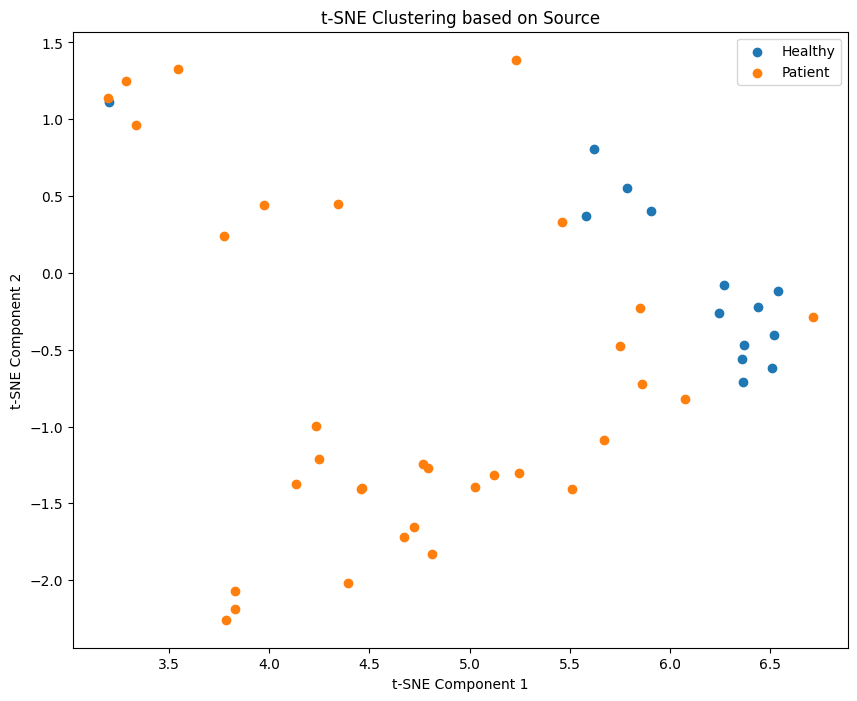

In [ ]:
# prompt: use t-sne cluster based on source column

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'new_df' is already defined as in the previous code

# Prepare the data for t-SNE
X = new_df.iloc[:, 2:]  # Exclude 'person-ID' and 'source' columns
source = new_df['source']

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42) # You can adjust perplexity, early_exaggeration, etc.
X_embedded = tsne.fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(10, 8))
for s in source.unique():
  plt.scatter(X_embedded[source == s, 0], X_embedded[source == s, 1], label=s)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering based on Source")
plt.legend()
# plt.show()

if len(path_4_png) > 0:
  plt.savefig(f'{path_4_png}/Tsne_projection_{input_type}_source.png')
else:
  plt.savefig(f'Tsne_projection__projection_{input_type}_source.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


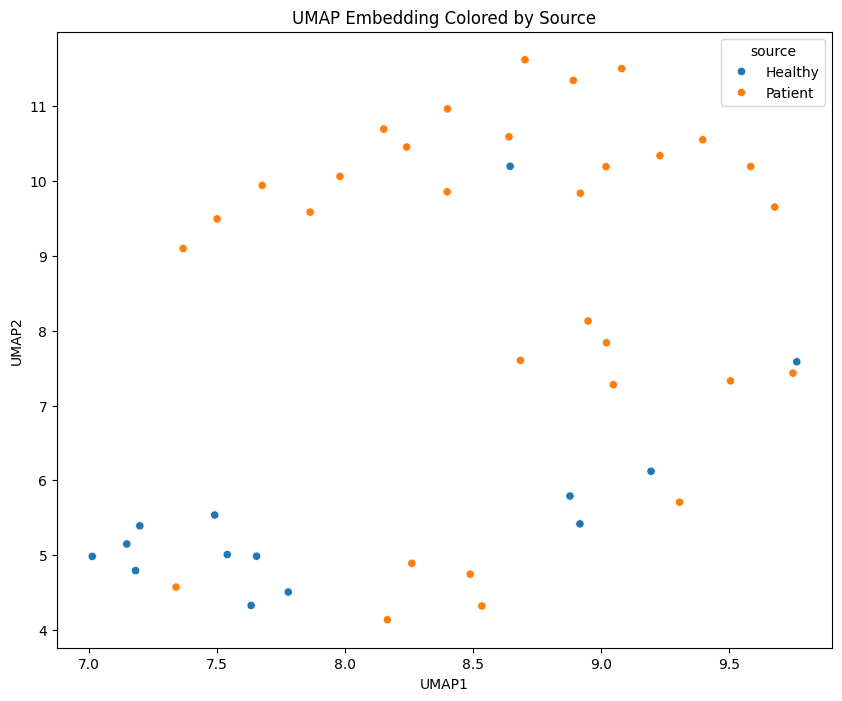

In [ ]:
# prompt: use umap cluster based on source column

# Assuming the previous code is executed and 'new_df' is available

import umap

# Create a UMAP reducer with specified parameters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)

# Fit and transform the data using the selected features, excluding 'person-ID' and 'source'
embedding = reducer.fit_transform(new_df.iloc[:, 2:])

# Create a new DataFrame with the embedding results
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Concatenate the embedding results with 'person-ID' and 'source'
embedding_df = pd.concat([new_df[['person-ID', 'source']], embedding_df], axis=1)

# Now you can use the 'embedding_df' for visualization or further analysis
# For example, plot the UMAP embedding colored by 'source':
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='source', data=embedding_df)
plt.title('UMAP Embedding Colored by Source')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


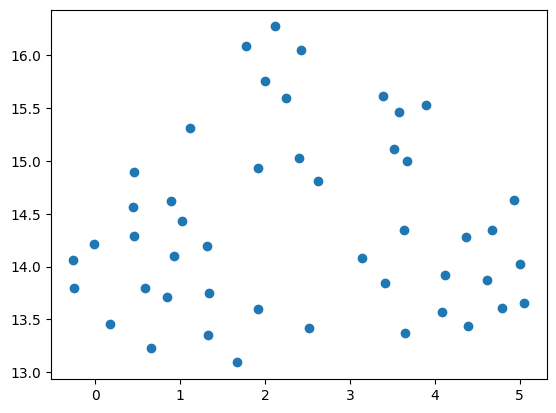

In [ ]:
#Use UMAP to cluster features in df_new

# Select the feature columns
# feature_cols = most_unique_features
feature_cols = new_df.columns[2:]
X = new_df[feature_cols].values


# Apply UMAP
# reducer = umap.UMAP(n_neighbors=7, min_dist=0.5, random_state=42) # Adjust parameters as needed
reducer = umap.UMAP(n_neighbors=35, min_dist=0.15, random_state=42) # Adjust parameters as needed
embedding = reducer.fit_transform(X)

# Add UMAP coordinates to the DataFrame
new_df['umap_x'] = embedding[:, 0]
new_df['umap_y'] = embedding[:, 1]



# Now you can use df_new['umap_x'] and df_new['umap_y'] for plotting or further analysis

# Example plot (optional)
plt.scatter(new_df['umap_x'], new_df['umap_y'])
plt.show()


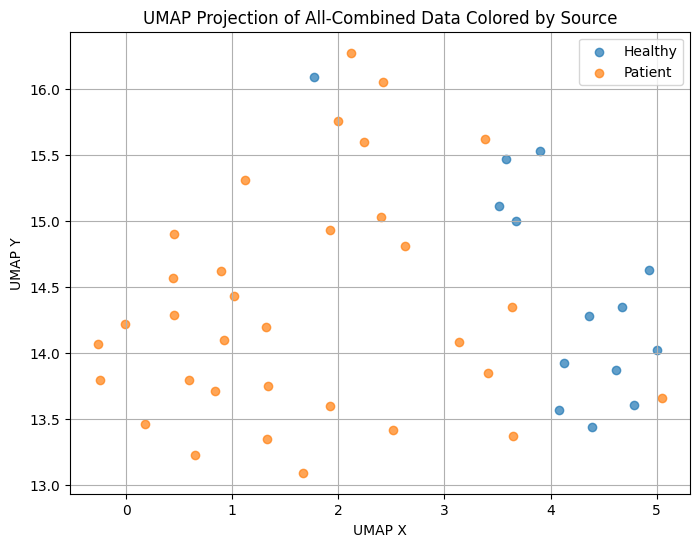

In [ ]:
# path_4_png=''

# Create the scatter plot with different symbols based on the 'source' column
plt.figure(figsize=(8, 6))

for source in new_df['source'].unique():
    subset = new_df[new_df['source'] == source]
    plt.scatter(subset['umap_x'], subset['umap_y'], label=source, alpha=0.7)

plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.title(f'UMAP Projection of {input_type} Data Colored by Source')
plt.legend()
plt.grid(True)
if len(path_4_png) > 0:
  plt.savefig(f'{path_4_png}/umap_projection_{input_type}_source.png')
  print(f'{path_4_png}/umap_projection_{input_type}_source.png')
else:
  plt.savefig(f'umap_projection_{input_type}_source.png')
plt.show()

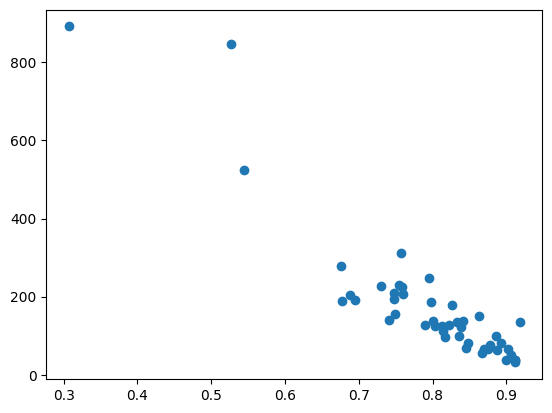

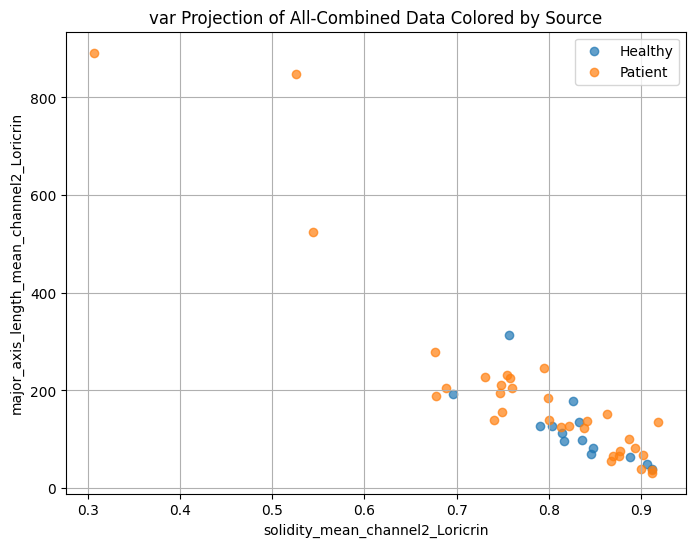

In [ ]:
# Now you can use df_new['umap_x'] and df_new['umap_y'] for plotting or further analysis

# Example plot (optional)
plt.scatter(new_df[most_unique_features[0]], new_df[most_unique_features[1]])
plt.show()

# Create the scatter plot with different symbols based on the 'source' column
plt.figure(figsize=(8, 6))

for source in new_df['source'].unique():
    subset = new_df[new_df['source'] == source]
    plt.scatter(subset[most_unique_features[0]], subset[most_unique_features[1]], label=source, alpha=0.7)

plt.xlabel(most_unique_features[0])
plt.ylabel(most_unique_features[1])
plt.title(f'var Projection of {input_type} Data Colored by Source')
plt.legend()
plt.grid(True)
if len(path_4_png) > 0:
  plt.savefig(f'{path_4_png}/var_projection_{input_type}_source.png')
else:
  plt.savefig(f'var_projection_{input_type}_source.png')
plt.show()

In [ ]:
# prompt: do a PCA analysis and explain first 5 most meaningful features

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'new_df' and 'most_unique_features' are defined from the previous code

# Select numerical features for PCA
features = new_df[most_unique_features]#.dropna()

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance for each principal component
print("Explained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
  print(f"PC{i+1}: {ratio:.4f}")


# Analyze loadings to interpret principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=most_unique_features)

# Print the top 5 features with highest absolute loading for each component
for i in range(5):  # Iterate through each PC
  print(f"\nTop 5 features for PC{i+1}:")
  top_features = loadings.iloc[:,i].abs().nlargest(5).index
  for feature in top_features:
      print(f"{feature}: {loadings.loc[feature,f'PC{i+1}']:.4f}")

Explained variance ratio for each principal component:
PC1: 0.1754
PC2: 0.1243
PC3: 0.1006
PC4: 0.0710
PC5: 0.0619

Top 5 features for PC1:
mean_intensity_min_channel2_Loricrin: 0.1079
quartiles-2_min_channel2_Loricrin: 0.1068
mean_intensity_median_channel2_Loricrin: 0.1043
mean_intensity_mean_channel2_Loricrin: 0.1042
quartiles-1_min_channel2_Loricrin: 0.1041

Top 5 features for PC2:
quartiles-2_min_channel2_Involucrin: 0.1301
major_axis_length_std_channel2_Involucrin: 0.1288
mean_intensity_min_channel2_Involucrin: 0.1253
major_axis_length_mean_channel2_Involucrin: 0.1227
quartiles-1_min_channel2_Involucrin: 0.1216

Top 5 features for PC3:
quartiles-0_max_channel2_Involucrin: 0.1134
mean_intensity_std_channel2_Involucrin: 0.1094
max_thickness_Involucrin: 0.1071
quartiles-1_std_channel2_Involucrin: 0.1040
mean_intensity_max_channel2_Involucrin: 0.1027

Top 5 features for PC4:
min_intensity_median_Loricrin: 0.1467
min_intensity_median_Filaggrin: 0.1467
min_intensity_mean_Loricrin: 0.144

In [ ]:
# Select numerical features for PCA
features = new_df[most_unique_features]#.dropna()

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 5 principal components
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance for each principal component
print("Explained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
  print(f"PC{i+1}: {ratio:.4f}")


# Analyze loadings to interpret principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=most_unique_features)

# Print the top 5 features with highest absolute loading for each component
for i in range(2):  # Iterate through each PC
  print(f"\nTop 2 features for PC{i+1}:")
  top_features = loadings.iloc[:,i].abs().nlargest(5).index
  for feature in top_features:
      print(f"{feature}: {loadings.loc[feature,f'PC{i+1}']:.4f}")

Explained variance ratio for each principal component:
PC1: 0.1754
PC2: 0.1243

Top 2 features for PC1:
mean_intensity_min_channel2_Loricrin: 0.1079
quartiles-2_min_channel2_Loricrin: 0.1068
mean_intensity_median_channel2_Loricrin: 0.1043
mean_intensity_mean_channel2_Loricrin: 0.1042
quartiles-1_min_channel2_Loricrin: 0.1041

Top 2 features for PC2:
quartiles-2_min_channel2_Involucrin: 0.1301
major_axis_length_std_channel2_Involucrin: 0.1288
mean_intensity_min_channel2_Involucrin: 0.1253
major_axis_length_mean_channel2_Involucrin: 0.1227
quartiles-1_min_channel2_Involucrin: 0.1216


## Explained variance ratio for each principal component:
PC1: 0.2054
PC2: 0.1178
PC3: 0.1005
PC4: 0.0666
PC5: 0.0573

### Top 5 features for PC1:
 * minor_axis_length_mean_channel1_Loricrin: 0.0903
 * minor_axis_length_mean_channel1_Filaggrin: 0.0903
 * minor_axis_length_median_channel1_Loricrin: 0.0900
 * minor_axis_length_median_channel1_Filaggrin: 0.0900
 * solidity_median_channel1_Filaggrin: 0.0899

### Top 5 features for PC2:
 * solidity_std_channel2_Loricrin: 0.0950
 * major_axis_length_mean_channel2_Loricrin: 0.0911
 * solidity_mean_channel2_Loricrin: -0.0910
 * solidity_mean_channel2_Filaggrin: -0.0882
 * major_axis_length_mean_channel2_Involucrin: 0.0876

### Top 5 features for PC3:
 * centroid-0_count_Loricrin: 0.0985
 * perimeter_count_channel2_Loricrin: 0.0985
 * bbox-3_count_Loricrin: 0.0985
 * bbox-0_count_Loricrin: 0.0985
 * area_count_channel2_Loricrin: 0.0985

### Top 5 features for PC4:
 * min_intensity_mean_Filaggrin: 0.1102
 * min_intensity_mean_Loricrin: 0.1102
 * min_intensity_median_Loricrin: 0.1099
 * min_intensity_median_Filaggrin: 0.1099
 * quartiles-1_max_channel2_Involucrin: 0.0928

### Top 5 features for PC5:
 * quartiles-0_mean_channel1_Involucrin: 0.1338
 * quartiles-0_median_channel1_Involucrin: 0.1332
 * quartiles-1_median_channel1_Involucrin: 0.1260
 * quartiles-1_mean_channel1_Involucrin: 0.1255
 * mean_intensity_mean_channel1_Involucrin: 0.1254

In [ ]:
new_df = new_df.reset_index(drop=True)

<ipython-input-41-9a69d68e2b5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['source'] = new_df['source']


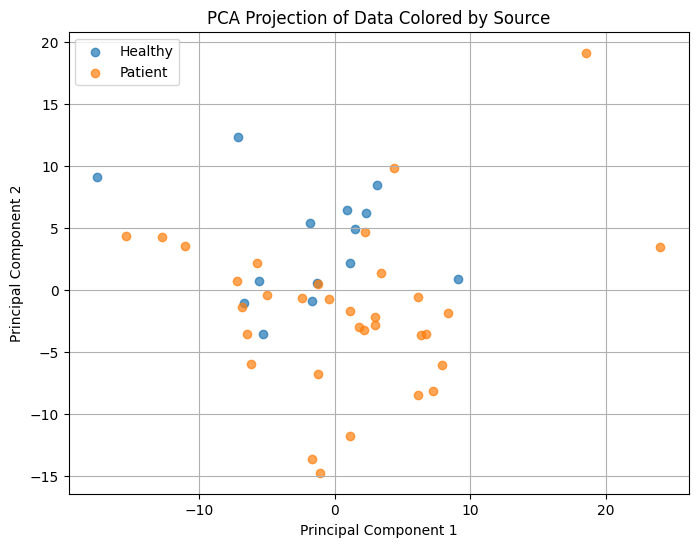

In [ ]:
# Select numerical features for PCA
# features = new_df[most_unique_features]#.dropna()

# # Apply PCA with 2 components for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(features)

# Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pca_df[['PC1', 'PC2']]
pca_df['source'] = new_df['source']


# Plot the PCA results
plt.figure(figsize=(8, 6))
for source in pca_df['source'].unique():
    subset = pca_df[pca_df['source'] == source]
    plt.scatter(subset['PC1'], subset['PC2'], label=source, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Data Colored by Source')
plt.legend()
plt.grid(True)

if len(path_4_png) > 0:
  plt.savefig(f'{path_4_png}/PCA_projection_{input_type}_source.png')
  print(f'{path_4_png}/PCA_projection_{input_type}_source.png')
else:
  plt.savefig(f'PCA_projection_{input_type}_source.png')
plt.show()

In [ ]:
x

NameError: name 'x' is not defined

## Details

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only one Type
df_fillagrin = df[df['type'] == 'Loricrin']

# Correlation analysis
correlation_matrix = df_fillagrin.iloc[:, :-4].corr()

In [ ]:
for column in correlation_matrix.columns:
  print(column)

In [ ]:
# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features for Filaggrin')
plt.show()

In [ ]:
# Select the 5 most unique features based on variance (you can use other metrics as well)
# variances = df_fillagrin.iloc[:, 3:].var()
variances = correlation_matrix.var()
most_unique_features = variances.nlargest(55).index #.nsmallest(25).index

# Create a new dataframe with the selected features
new_df = df_fillagrin[['source','image-ID', 'type', 'image_name'] + list(most_unique_features)]

new_df.head()

In [ ]:
most_unique_features

In [ ]:

# Drop rows with NaN values in the specified columns
new_df = new_df.dropna(subset=list(most_unique_features))

In [ ]:
#Use UMAP to cluster features in df_new

import umap
import pandas as pd


# Select the feature columns
feature_cols = most_unique_features
X = new_df[feature_cols].values


# Apply UMAP
reducer = umap.UMAP(n_neighbors=7, min_dist=0.5, random_state=42) # Adjust parameters as needed
embedding = reducer.fit_transform(X)

# Add UMAP coordinates to the DataFrame
new_df['umap_x'] = embedding[:, 0]
new_df['umap_y'] = embedding[:, 1]

# Now you can use df_new['umap_x'] and df_new['umap_y'] for plotting or further analysis

# Example plot (optional)
plt.scatter(new_df['umap_x'], new_df['umap_y'])
plt.show()

In [ ]:
# prompt: plot scatter plot of umap_x and umap_y with different symbols based on source column

import matplotlib.pyplot as plt

# Create the scatter plot with different symbols based on the 'source' column
plt.figure(figsize=(8, 6))

for source in new_df['source'].unique():
    subset = new_df[new_df['source'] == source]
    plt.scatter(subset['umap_x'], subset['umap_y'], label=source, alpha=0.7)

plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.title('UMAP Projection of Filaggrin Data Colored by Source')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create the scatter plot with different symbols based on the 'source' column
plt.figure(figsize=(8, 6))

for source in new_df['type'].unique():
    subset = new_df[new_df['type'] == source]
    plt.scatter(subset['umap_x'], subset['umap_y'], label=source, alpha=0.7)

plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.title('UMAP Projection of Filaggrin Data Colored by Type')
plt.legend()
plt.grid(True)
plt.show()